# Advertising Sales Channel Prediction
## Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [21]:
df = pd.read_csv(r'C:\Users\tusha\Downloads\Advertising.csv',index_col=0)
df
#we have to predict sales

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


* tv, radio,newspaper are the features.

* sale is the response which is effected when the tv,radio and newspaper goes on for selling.

* here our response variable is continuous, which tells us that it is a regression problem.

In [23]:
df.shape

(200, 4)

In [24]:
# It tells the no. of rows and columns.i.e 200 rows and 4 columns

In [25]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [61]:
# no. of count tells that there are no missing data in the dataset.

In [27]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [28]:
df.info()
# printing the summary of the dataframe.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [29]:
# finding the count of missing values from different columns.
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [30]:
# There are no missing values in the dataset.

<AxesSubplot:>

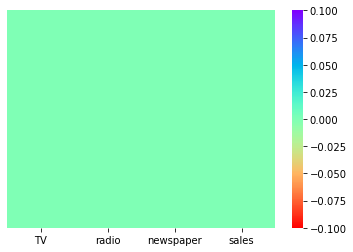

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='rainbow_r')  

#### 
Now, let's showcase the relationship between the feature and target column

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

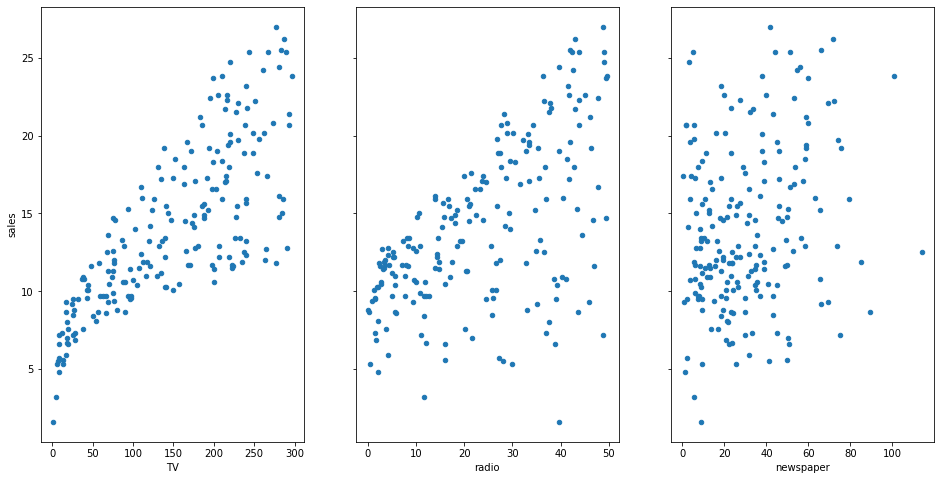

In [32]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [ ]:
# The scatterplot shows that there is a strong relationship between tv and sales.

In [ ]:
im

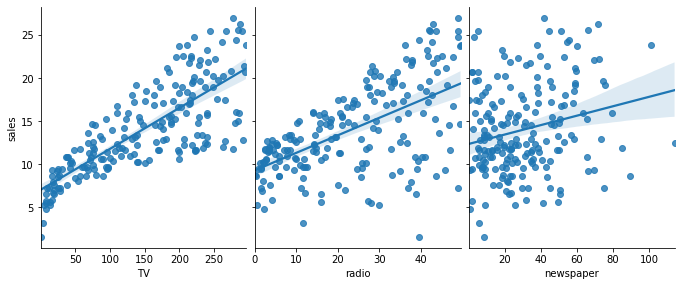

In [60]:
sns.pairplot(df,x_vars = ['TV','radio','newspaper'],y_vars = 'sales',height = 4,aspect = 0.8,kind = 'reg')

In [44]:
# from this pairplot we can see that relation of tv and radio with sales is strong.
# while relation between newspaper and sales is weaker.

### Analyzing the outliers

C:\Users\tusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


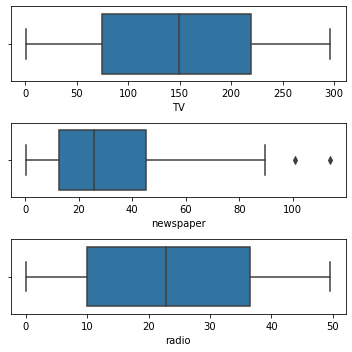

In [48]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

In [49]:
# the outliers present in the dataset are not in considerable amount.

### Univariate analysis

In [50]:
# here sales is a target variable

C:\Users\tusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


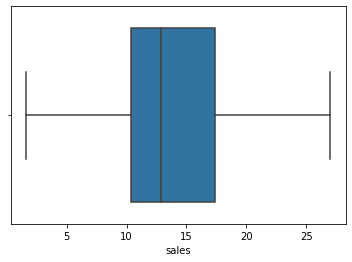

In [53]:
sns.boxplot(df['sales'])
plt.show()

In [54]:
# from the boxplot we can see that there are no outliers in the target sales.
# The average value of sales is about 15000 $

## Multivariate analysis

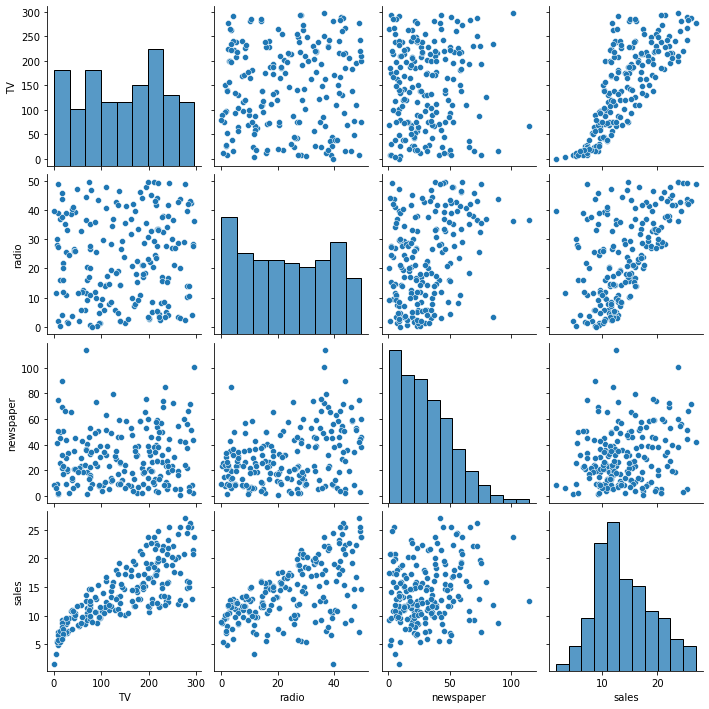

In [62]:
sns.pairplot(df)
plt.show()

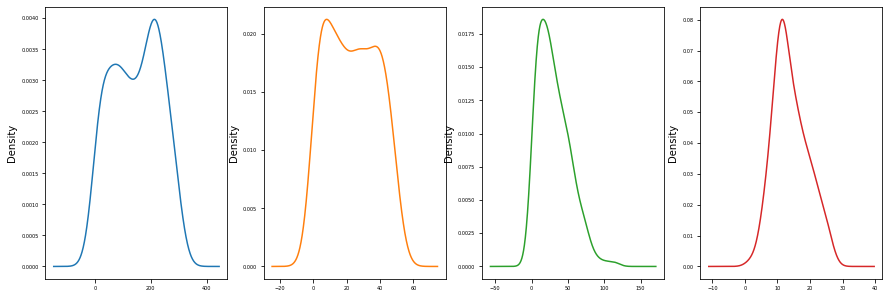

In [72]:
df.plot(kind='density',subplots=True,layout=(1,4),sharex=False, legend=False, fontsize=5,figsize=(15,5))
plt.show()

In [33]:
corr_mat=df.corr()

In [35]:
corr_mat

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [38]:
# from this correlation matrix we can see that relation between tv and sales is very strong.
# the relation between sales and newspaper is least.

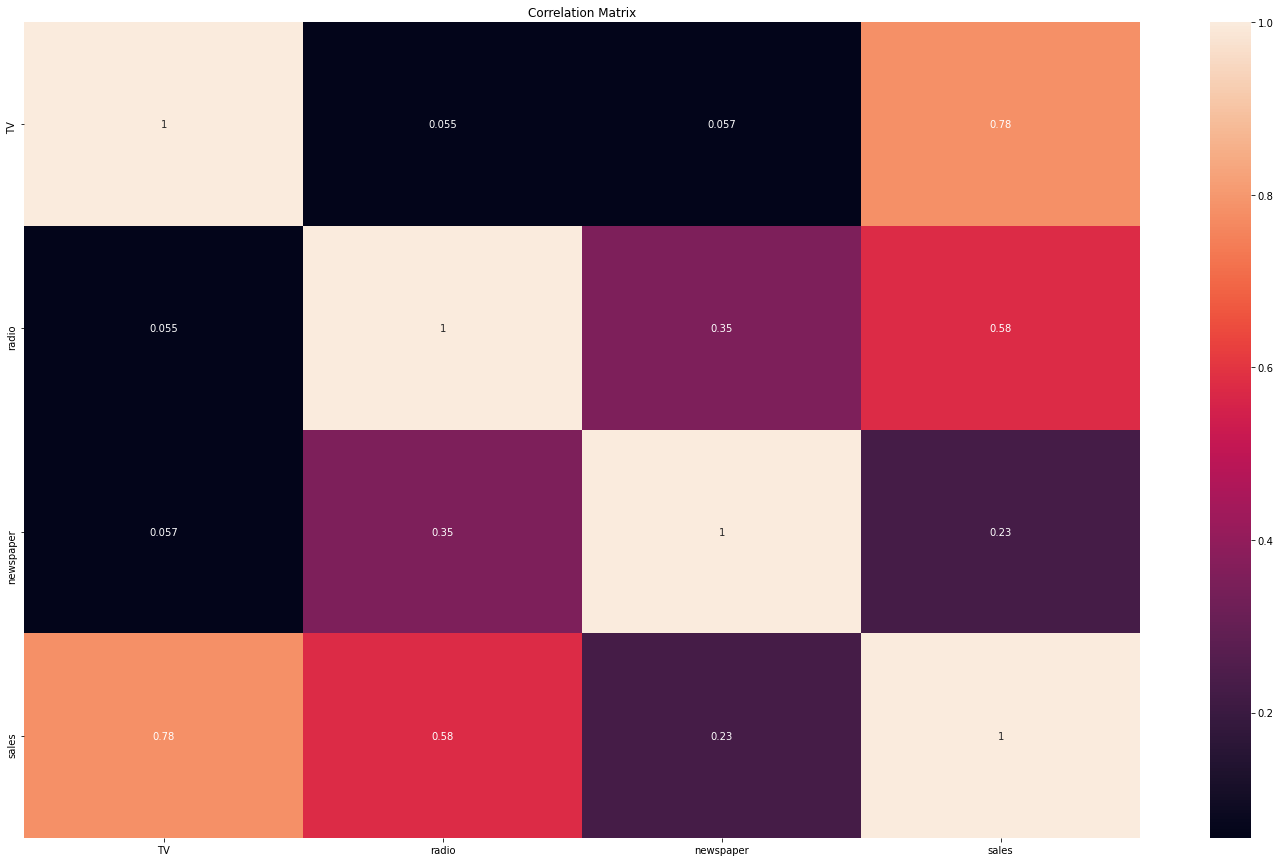

In [37]:
plt.figure(figsize=[25,15])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [39]:
# heatmap doesn't calculate the correlation rather it displays the correlation.

# splitting X and y into training and testing sets

In [117]:
from sklearn.preprocessing import StandardScaler
# Data Scaling. Formula Z = (X-mean)/std

scaler = StandardScaler()

X_scaled = scaler.fit_transform(x)

In [118]:
# How does X_scaled data looks like
X_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

#####  
Let's go ahead and use linear regression and see how good it fits our data. But first let's split our data in train and test.

In [119]:
# Split data into train and test. Model will be built on training data and tested on test data.
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=340)

In [120]:
y_train.head()

124    15.2
142    19.2
55     20.2
197     9.7
172    14.5
Name: sales, dtype: float64

### Model instantiating and training

In [121]:
regression = LinearRegression()

regression.fit(X_train,y_train)

LinearRegression()

In [125]:
# lets take real data to check how model predicts
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [126]:
# Adjusted R2 score

regression.score(X_train,y_train)

0.8941814100449432

#### Let's check how well model fits the test data.

In [129]:
regression.score(X_test,y_test)

0.9067211547859955

#### Model Evaluation
* Mean absolute error (MAE): Represents acerage error
* Means quared error (MSE): Similar to MAE but noise is exaggerated and larger error are "punished". It is harder to interpret than MAE as it's not in base units, however, it is generally more popular.
* Root mean squared error (RMSE): Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it's in base units. It is recommended that RMSE be used as the primary metric to interpret your model.

In [131]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [134]:
y_pred = regression.predict(X_test)

In [135]:
mean_absolute_error(y_test,y_pred)

1.1547282167263326

In [136]:
mean_squared_error(y_test,y_pred)

2.2171650201222404

In [138]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.4890147817003834

In [142]:
# Create a DataFrame with the minimum and maximum values of TV
x_new = pd.DataFrame({'TV': [df.TV.min(), df.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [144]:
# make predictions for those x values and store them
y_pred = regression.predict(X_test)

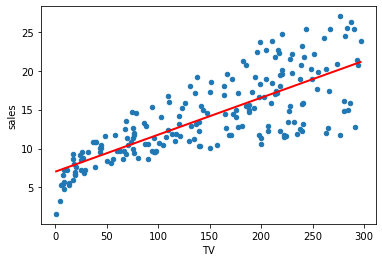

In [145]:
# first, plot the observed data
df.plot(kind='scatter', x='TV', y ='sales')

#then plot the least squares line
plt.plot(x_new, preds, c='red', linewidth=2)

In [146]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~TV', data=df).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [147]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [148]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

## Multiple Linear Regression

In [149]:
# Create X and y 
x = df[['TV', 'radio', 'newspaper']]
y = df.sales

lm = LinearRegression()
lm.fit(x,y)

#print intercept and coefficients

print('Intercept : >', lm.intercept_)
print('TV : ->',lm.coef_[0])
print('Radio : ->',lm.coef_[1])
print('Newspaper : ->',lm.coef_[2])


Intercept : > 2.9388893694594067
TV : -> 0.04576464545539761
Radio : -> 0.18853001691820462
Newspaper : -> -0.0010374930424762972


In [150]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        14:59:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The coefficient for TV is 0.0458, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

### R - squared is 0.896
Meaning that 89.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

### F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

In [151]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=df).fit()
lm.rsquared

0.8971942610828957

In [152]:
# add Nwwespaper to the model ( which we believe has no association with sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
lm.rsquared

0.8972106381789522

In [153]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

In [154]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividing by the L1-norm
lasscv = LassoCV(alphas= None, max_iter = 1000, normalize = True)
lasscv.fit(x, y)

LassoCV(normalize=True)

In [155]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0076459100018857985

In [156]:
# now that we have best parameter, Let's use Lasso regression and see how well our dat has fitted before

lasso_reg = Lasso (alpha)
lasso_reg.fit(x,y)

Lasso(alpha=0.0076459100018857985)

In [157]:
lasso_reg.score(x,y)

0.8972106161029177

#### Using ridge regression model 

In [159]:
# RidgeCV will return best alpha and codfficients after performing 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)

ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [160]:
ridgecv.alpha_

0.001

In [161]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.001)

In [162]:
ridge_model.score(X_test, y_test)

0.9067214489945753

####  
We got around samer2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

#### Let's see the underlying assumptions:-
* The regression model is linear in terms of coefficients and error term.
* The mean of the residuals is zero.
* The error terms are not correlated with each other,i.e. given an error value; we cannotpredict the next error value.
* The independent variables(x) are uncorrelated with the residual term, also termed as exogeneity. This, in layman, generalises that in no way should the error term be predicted given the value of independent variables.
* The error terms have a constant variance, i.e. homoscedasticity.
* No Multicollinearity, i.e. no independent variables should be correlated woth each other or affect one another. If there is multicollinearity, the precision of prediction by the OLS model decreases.
* The error terms are normally distributed.

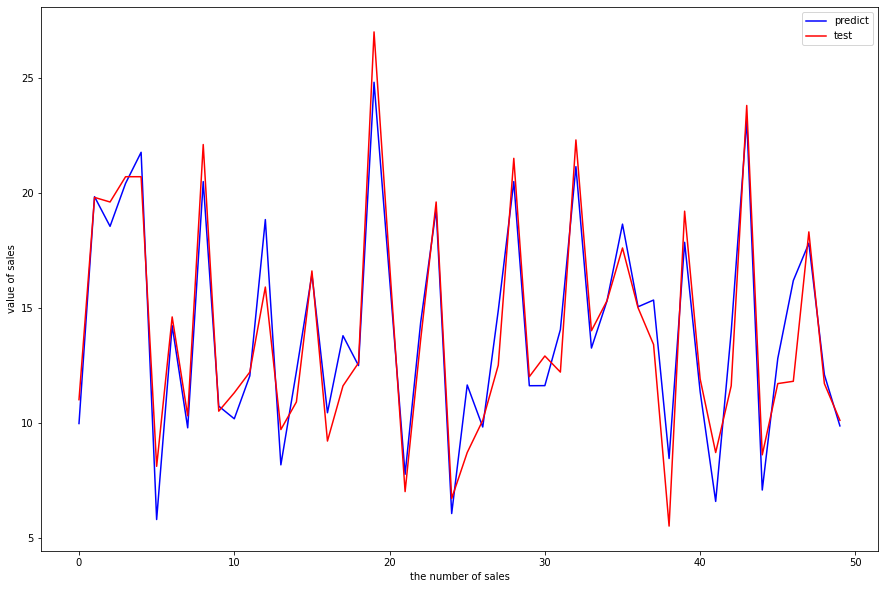

In [166]:


plt.figure(figsize=(15,10))  

plt.plot(range(len(y_pred)),y_pred,'b',label="predict")  

plt.plot(range(len(y_pred)),y_test,'r',label="test")  

plt.legend(loc="upper right") # Display label of FIG.  

plt.xlabel("the number of sales")  

plt.ylabel('value of sales')  

plt.show()  



In [164]:
# the red line is the true value of the curve, the predicted value of blue curve

#### You can save the model and later you can use it for prediction

In [174]:
import pickle

In [177]:
Pkl_Filename="regression.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regression, file)
    
# Load the model back from file

with open(Pkl_Filename,'rb') as file:
    Pickle_regression = pickle.load(file)
    
regression

LinearRegression()

In [181]:
import joblib
lr=LinearRegression
joblib.dump(lr,'./LinearRegression.pkl')

lr = joblib.load('./LinearRegression.pkl')